## 분석에 사용할 도구를 불러옵니다.

In [1]:
# 필요한 라이브러리를 로드합니다.
# pandas, numpy, seaborn, matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Seaborn 설정으로 시각화의 스타일, 폰트 설정하기
* [matplotlib.pyplot.rc — Matplotlib 3.1.3 documentation](https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.rc.html)

In [2]:
# seaborn 의 set 기능을 통해 폰트, 마이너스 폰트 설정, 스타일 설정을 합니다.
# Wind : "Malgun Gothic", MAC:"AppleGothic"
sns.set(font="Malgun Gothic",
       rc={"axes.unicode_minus":False},
       style="whitegrid")

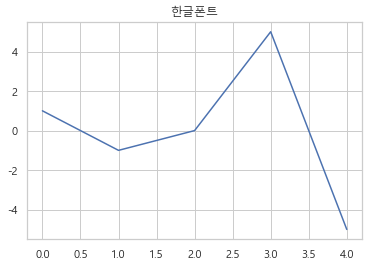

In [3]:
# 한글폰트 설정 확인을 합니다.
pd.Series([1, -1, 0 , 5, -5]).plot(title="한글폰트")

In [4]:
# 그래프가 선명하게 표시되도록 합니다.
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

## 데이터 로드
- https://www.data.go.kr/data/15012890/standard.do
- csv 파일 다운로드

In [5]:
# 데이터를 로드해서 df 라는 변수에 담습니다.
df = pd.read_csv("data/전국도시공원표준데이터.csv",encoding="cp949")
df.shape

(19593, 19)

In [6]:
# 미리보기를 합니다.
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명
0,41135-00098,샘터공원,어린이공원,NaN,경기도 성남시 분당구 구미동 87,37.348802,127.118613,3620.1,NaN,어린이놀이터,벤치,NaN,NaN,1991-01-08,분당구녹지공원과,031-729-7461,2020-01-17,3780000,경기도 성남시
1,29200-00061,제2풍영정,근린공원,NaN,"광주광역시 광산구 운남동 793-1, 780-1",35.177519,126.811916,26200.7,"배드민턴장, 농구장","조합놀이대, 기타놀이기구",NaN,야외무대,관리사무소,1997-08-12,광주광역시 광산구청,062-960-8704,2020-07-16,3630000,광주광역시 광산구
2,29200-00062,맑은샘,어린이공원,광주광역시 광산구 풍영로 63,광주광역시 광산구 월곡동 681-1,35.178777,126.810674,1500.1,NaN,"조합놀이, 기타놀이기구",NaN,NaN,NaN,1997-08-12,광주광역시 광산구청,062-960-8712,2020-07-16,3630000,광주광역시 광산구
3,29200-00063,야호숲,어린이공원,NaN,광주광역시 광산구 월곡동 685-2 (운남 2지구),35.173388,126.810754,1500.3,NaN,"그네, 조합놀이, 기타놀이기구",NaN,NaN,NaN,1997-08-12,광주광역시 광산구청,062-960-8712,2020-07-16,3630000,광주광역시 광산구
4,29200-00064,풍영정천,어린이공원,NaN,광주광역시 광산구 운남동 781-2 (운남 2지구),35.177946,126.814155,1520,NaN,조합놀이,NaN,NaN,NaN,1997-08-12,광주광역시 광산구청,062-960-8712,2020-07-16,3630000,광주광역시 광산구


## 기본 정보 보기

In [7]:
# info로 기본 정보를 봅니다.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19593 entries, 0 to 19592
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   관리번호          19593 non-null  object 
 1   공원명           19593 non-null  object 
 2   공원구분          19593 non-null  object 
 3   소재지도로명주소      7730 non-null   object 
 4   소재지지번주소       18672 non-null  object 
 5   위도            19593 non-null  float64
 6   경도            19593 non-null  float64
 7   공원면적          19593 non-null  object 
 8   공원보유시설(운동시설)  5046 non-null   object 
 9   공원보유시설(유희시설)  7152 non-null   object 
 10  공원보유시설(편익시설)  5397 non-null   object 
 11  공원보유시설(교양시설)  1245 non-null   object 
 12  공원보유시설(기타시설)  3166 non-null   object 
 13  지정고시일         16604 non-null  object 
 14  관리기관명         18379 non-null  object 
 15  전화번호          17934 non-null  object 
 16  데이터기준일자       19593 non-null  object 
 17  제공기관코드        19593 non-null  object 
 18  제공기관명         19593 non-nu

In [8]:
# 결측치의 수를 구합니다.
df.isnull().sum()


관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        11863
소재지지번주소           921
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    14547
공원보유시설(유희시설)    12441
공원보유시설(편익시설)    14196
공원보유시설(교양시설)    18348
공원보유시설(기타시설)    16427
지정고시일            2989
관리기관명            1214
전화번호             1659
데이터기준일자             0
제공기관코드              0
제공기관명               0
dtype: int64

In [9]:
# 결측치 비율 구하기
# 결측의 평균을 통해 비율을 구하고 100을 곱해줍니다.
round(df.isnull().mean() * 100, 2)


관리번호             0.00
공원명              0.00
공원구분             0.00
소재지도로명주소        60.55
소재지지번주소          4.70
위도               0.00
경도               0.00
공원면적             0.00
공원보유시설(운동시설)    74.25
공원보유시설(유희시설)    63.50
공원보유시설(편익시설)    72.45
공원보유시설(교양시설)    93.65
공원보유시설(기타시설)    83.84
지정고시일           15.26
관리기관명            6.20
전화번호             8.47
데이터기준일자          0.00
제공기관코드           0.00
제공기관명            0.00
dtype: float64

## 결측치 시각화

* 그래프의 색상 선택 : [Choosing Colormaps in Matplotlib — Matplotlib 3.1.0 documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

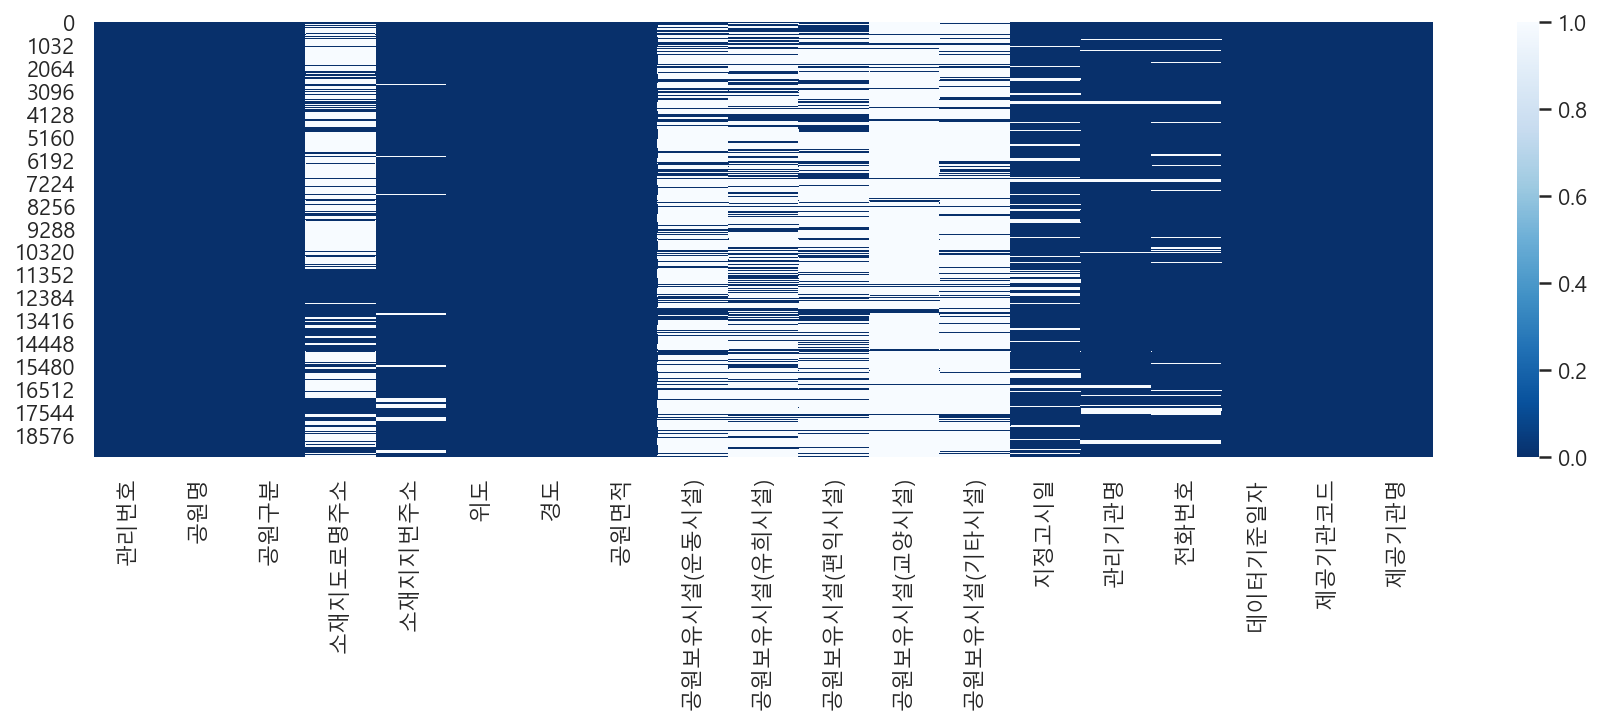

In [10]:
# seaborn을 통해 결측치 그래프를 그려봅니다.

null = df.isnull()
plt.figure(figsize=(15,4))
sns.heatmap(null, cmap="Blues_r")

# 데이터 전처리
* 불필요한 컬럼 제거
* 시도 결측치 처리
    * 다른 데이터로 대체
    * 도로명 혹은 지번 둘 중 하나만 있다면 있는 데이터로 대체
* 아웃라이어 데이터 제거 혹은 대체
    * 위경도가 국내 범위를 벗어나는 데이터의 경우 제외하고 그리도록 처리

## 불필요한 컬럼 제거하기

In [11]:
# 전체 컬럼명을 출력해 봅니다.
df.columns


Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명'],
      dtype='object')

In [12]:
# drop 으로 'Unnamed: 19' 를 제거하기
print(df.shape)
#df = df.drop(['Unnamed: 19'], axis=1)
print(df.shape)

(19593, 19)
(19593, 19)


## 결측치 대체
### 도로명 주소와 지번 주소 
* 둘 중 하나만 있을 때 나머지 데이터로 결측치 대체하기

In [13]:
# 도로명 주소의 널값 수
df['소재지도로명주소'].isnull().sum()

11863

In [14]:
# 지번 주소의 널값 수
df['소재지지번주소'].isnull().sum()

921

In [15]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치가 아닌 데이터를 찾습니다.
df[df['소재지도로명주소'].notnull() & df['소재지지번주소'].notnull()].shape


(6809, 19)

In [16]:
# "소재지도로명주소"의 결측치를 fillna 를 통해 "소재지지번주소"로 채웁니다.
df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])


In [17]:
# "소재지도로명주소"의 결측치수를 세어봅니다.
df['소재지도로명주소'].isnull().sum()


0

In [18]:
# "소재지도로명주소"와 "소재지지번주소"가 모두 결측치인 데이터를 찾습니다.
df[df['소재지도로명주소'].isnull() & df['소재지지번주소'].isnull()].shape


(0, 19)

## 파생변수 만들기
### 주소를 통한 시도, 구군 변수 생성하기

In [19]:
# 소재지도로명주소로 시도, 구군 변수 생성하기
# .str.split(' ', expand=True)[0] 을 통해 공백문자로 분리하고 리스트의 첫번째 값을 가져오도록 하기
df['시도']= df['소재지도로명주소'].str.split(expand=True)[0]
df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도
0,41135-00098,샘터공원,어린이공원,경기도 성남시 분당구 구미동 87,경기도 성남시 분당구 구미동 87,37.348802,127.118613,3620.1,NaN,어린이놀이터,벤치,NaN,NaN,1991-01-08,분당구녹지공원과,031-729-7461,2020-01-17,3780000,경기도 성남시,경기도
1,29200-00061,제2풍영정,근린공원,"광주광역시 광산구 운남동 793-1, 780-1","광주광역시 광산구 운남동 793-1, 780-1",35.177519,126.811916,26200.7,"배드민턴장, 농구장","조합놀이대, 기타놀이기구",NaN,야외무대,관리사무소,1997-08-12,광주광역시 광산구청,062-960-8704,2020-07-16,3630000,광주광역시 광산구,광주광역시
2,29200-00062,맑은샘,어린이공원,광주광역시 광산구 풍영로 63,광주광역시 광산구 월곡동 681-1,35.178777,126.810674,1500.1,NaN,"조합놀이, 기타놀이기구",NaN,NaN,NaN,1997-08-12,광주광역시 광산구청,062-960-8712,2020-07-16,3630000,광주광역시 광산구,광주광역시
3,29200-00063,야호숲,어린이공원,광주광역시 광산구 월곡동 685-2 (운남 2지구),광주광역시 광산구 월곡동 685-2 (운남 2지구),35.173388,126.810754,1500.3,NaN,"그네, 조합놀이, 기타놀이기구",NaN,NaN,NaN,1997-08-12,광주광역시 광산구청,062-960-8712,2020-07-16,3630000,광주광역시 광산구,광주광역시
4,29200-00064,풍영정천,어린이공원,광주광역시 광산구 운남동 781-2 (운남 2지구),광주광역시 광산구 운남동 781-2 (운남 2지구),35.177946,126.814155,1520,NaN,조합놀이,NaN,NaN,NaN,1997-08-12,광주광역시 광산구청,062-960-8712,2020-07-16,3630000,광주광역시 광산구,광주광역시


In [20]:
# 구군 가져오기
df['구군']= df['소재지도로명주소'].str.split(expand=True)[1]
df[['소재지도로명주소', '시도','구군']].sample(5)

,소재지도로명주소,시도,구군
19341,전라남도 여수시 국동 193-413,전라남도,여수시
12310,경상남도 창원시 의창구 명서동 114-1,경상남도,창원시
1626,대전광역시 유성구 하기동 550,대전광역시,유성구
2468,충청북도 충주시 호암동 681-8 일원,충청북도,충주시
6616,경기도 평택시 비전동 867,경기도,평택시


In [21]:
# 시도 데이터의 빈도수 세어보기
df['시도'].value_counts()


경기도        3900
전라남도       2036
경상남도       1860
서울특별시      1856
충청남도       1691
전라북도       1117
충청북도        915
울산광역시       883
경상북도        880
광주광역시       856
강원도         754
부산광역시       689
인천광역시       687
대구광역시       614
대전광역시       499
제주특별자치도     245
세종특별자치시      70
-            40
부산시           1
Name: 시도, dtype: int64

In [22]:
# 강원은 "강원도"로 변경해줄 필요가 보입니다.
df['시도'] = df['시도'].replace("부산시","부산광역시")
#df['시도'] = df['시도'].replace("강원","강원도")
df['시도'].value_counts()

경기도        3900
전라남도       2036
경상남도       1860
서울특별시      1856
충청남도       1691
전라북도       1117
충청북도        915
울산광역시       883
경상북도        880
광주광역시       856
강원도         754
부산광역시       690
인천광역시       687
대구광역시       614
대전광역시       499
제주특별자치도     245
세종특별자치시      70
-            40
Name: 시도, dtype: int64

## 이상치 제거
* 경도, 위도의 이상치 처리하기

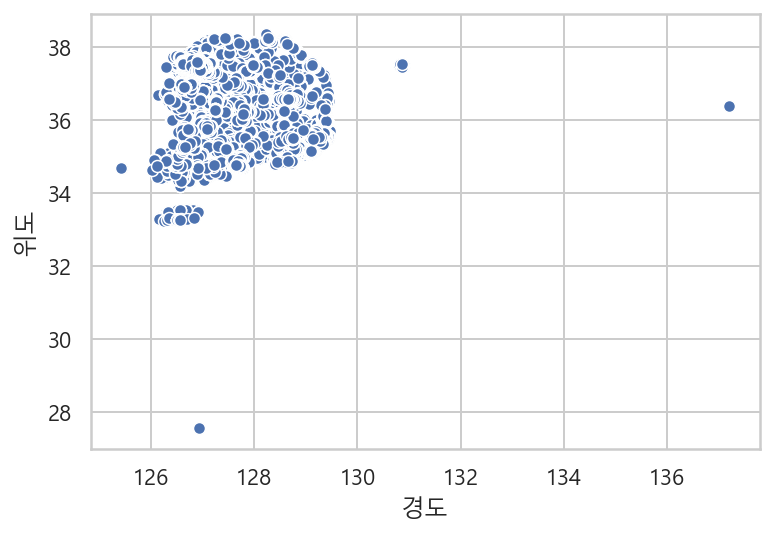

In [23]:
# 위경도 시각화
sns.scatterplot(data = df, x="경도", y="위도")


In [24]:
# 위 지도로 위도와 경도의 아웃라이어 데이터를 제외하고 출력해 봅니다.
# 좀 더 정확하게 출력하려면 대한민국 위경도 데이터 범위를 다시 넣어줍니다. 
# 이상치를 제거한 데이터를 df_park 라는 새로운 변수에 담습니다.
df_park = df[(df['경도'] < 132) & (df['위도'] > 32)].copy()

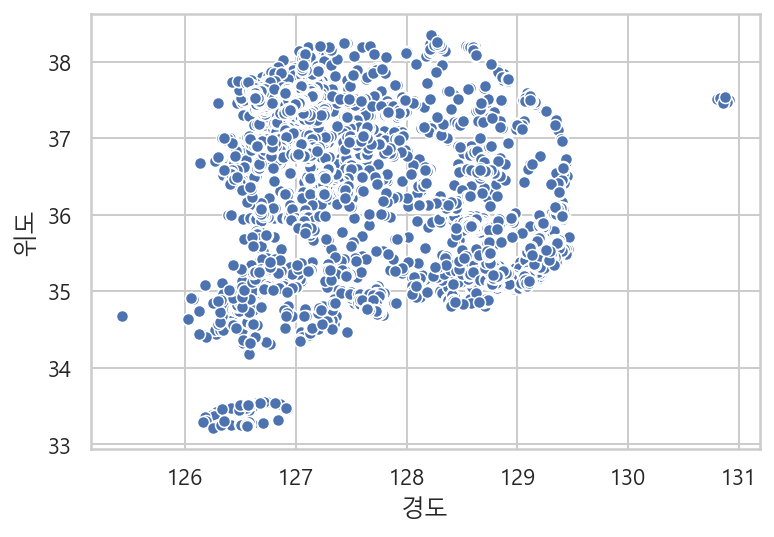

In [25]:
# 위도 경도의 아웃라이어 데이터가 제거되었는지 확인함
sns.scatterplot(data = df_park, x="경도", y="위도")

In [26]:
# 위도와 경도의 요약값을 describe 로 봅니다.
df[['위도','경도']].describe()


,위도,경도
count,19593.000000,19593.000000
mean,36.338749,127.524585
std,1.064608,0.875285
min,27.551606,125.430955
25%,35.255135,126.881875
50%,36.374582,127.123134
75%,37.400372,128.353493
max,38.350990,137.202661


In [27]:
# 위경도가 잘못입력된 데이터를 봅니다.
# 주소가 잘못되지는 않았습니다.
# 주소를 통해 위경도를 다시 받아올 필요가 있습니다.
df[(df['경도'] > 132) | (df['위도'] < 32)]


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),...,공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
1647,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258,NaN,NaN,...,NaN,NaN,2003-04-18,충청북도 청주시 푸른도시사업본부 공원관리과,043-201-4433,2020-07-16,5710000,충청북도 청주시,충청북도,청주시
16859,11440-00004,와우공원,근린공원,서울특별시 마포구 창전동3-231 등 59필지,서울특별시 마포구 창전동3-231 등 59필지,27.551606,126.929047,73590,NaN,NaN,...,NaN,NaN,1940-03-12,서울특별시 마포구,02-3153-9553,2019-07-22,3130000,서울특별시 마포구,서울특별시,마포구


## 날짜 데이터 다루기

In [28]:
# 지정고시일의 데이터 타입을 봅니다.
df['지정고시일'].head()


0    1991-01-08
1    1997-08-12
2    1997-08-12
3    1997-08-12
4    1997-08-12
Name: 지정고시일, dtype: object

In [29]:
# 지정고시일의 데이터 타입을 datetime 형태로 변경합니다.
df['지정고시일']= pd.to_datetime(df['지정고시일'])
df['지정고시일'].head()

0   1991-01-08
1   1997-08-12
2   1997-08-12
3   1997-08-12
4   1997-08-12
Name: 지정고시일, dtype: datetime64[ns]

In [30]:
# 고시연도와 고시월을 지정고시일에서 추출해서 파생변수를 만듭니다.
df['고시연도'] = df['지정고시일'].dt.year
df['고시월'] = df['지정고시일'].dt.month

df[['지정고시일', '고시연도' ,'고시월']].head()

,지정고시일,고시연도,고시월
0,1991-01-08,1991.0,1.0
1,1997-08-12,1997.0,8.0
2,1997-08-12,1997.0,8.0
3,1997-08-12,1997.0,8.0
4,1997-08-12,1997.0,8.0


In [31]:
# 송정공원의 고시연도를 찾아봅니다. 데이터 전처리가 맞게 되었는지 확인해 봅니다.
df.loc[df['공원명'].str.contains("송정") , ['공원명', '고시연도']]


,공원명,고시연도
465,송정소공원,2007.0
816,송정1공원,2010.0
2143,송정5공원,2015.0
2144,송정4공원,2015.0
2145,송정3공원,2015.0
2146,송정2공원,2015.0
2147,송정1공원,2015.0
2850,송정제1공원,2014.0
2851,송정제2공원,2014.0
2852,송정제3공원,2014.0


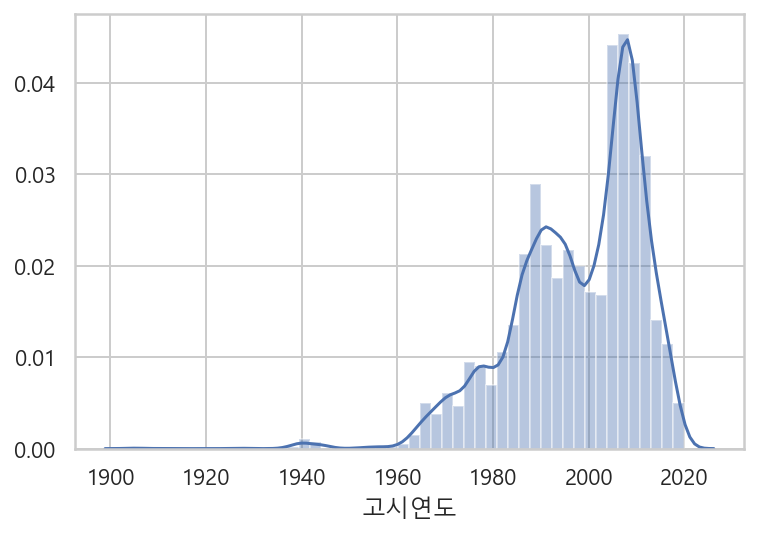

In [32]:
# 고시연도의 분포를 distplot 으로 그립니다.
# 이 때, 결측치가 있으면 오류가 나기 때문에 결측치가 없는 데이터만 따로 모아 그립니다.
sns.distplot(df.loc[df["고시연도"].notnull(), "고시연도"])


* 판다스 스타일링 : [Styling — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)
* 숫자의 많고 적음에 따라 heatmap 처럼 스타일을 표현 가능 합니다.

In [33]:
# 연도와 월별 고시 현황을 pivot_table로 그려봅니다.
# year_month 라는 변수에 담아 재사용 합니다.
# 데이터가 많기 때문에 2000년보다 크고 2019년보다 작은 연도의 데이터만 봅니다.
year_month = pd.pivot_table(df, index="고시연도", columns="고시월", 
               values="공원명", aggfunc="count")
year_month = year_month[(year_month.index > 2000) & 
                        (year_month.index < 2019)]
year_month.style.background_gradient()


고시월,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
고시연도,,,,,,,,,,,,
2001.0,50.000000,41.000000,7.000000,67.000000,17.000000,17.000000,7.000000,18.000000,38.000000,37.000000,38.000000,52.000000
2002.0,37.000000,19.000000,18.000000,10.000000,29.000000,17.000000,49.000000,21.000000,7.000000,40.000000,59.000000,55.000000
2003.0,40.000000,13.000000,17.000000,18.000000,15.000000,34.000000,6.000000,8.000000,7.000000,16.000000,56.000000,52.000000
2004.0,62.000000,26.000000,20.000000,24.000000,13.000000,24.000000,9.000000,74.000000,10.000000,26.000000,64.000000,120.000000
2005.0,72.000000,27.000000,11.000000,22.000000,42.000000,35.000000,16.000000,42.000000,22.000000,39.000000,62.000000,123.000000
2006.0,86.000000,35.000000,37.000000,32.000000,59.000000,47.000000,29.000000,36.000000,26.000000,52.000000,128.000000,131.000000
2007.0,73.000000,12.000000,11.000000,45.000000,18.000000,57.000000,66.000000,77.000000,82.000000,164.000000,240.000000,109.000000
2008.0,163.000000,48.000000,78.000000,43.000000,30.000000,111.000000,18.000000,61.000000,33.000000,27.000000,16.000000,147.000000
2009.0,65.000000,34.000000,161.000000,126.000000,75.000000,63.000000,38.000000,43.000000,117.000000,28.000000,79.000000,139.000000


## 텍스트 데이터 다루기
### 정규표현식 

* [정규 표현식 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%A0%95%EA%B7%9C_%ED%91%9C%ED%98%84%EC%8B%9D)


* 파이썬 공식문서 정규표현식 참고하기 : 
    * https://docs.python.org/3.8/library/re.html#re.sub
    
    
* 문자열 바꾸기 : re.sub("규칙", "패턴", "데이터")
    * https://docs.python.org/3.8/library/re.html#text-munging


* 정규표현식 문자열 패턴
    * https://docs.python.org/3.8/howto/regex.html#matching-characters

    
    
* [    ] : 일치시킬 문자 세트의 패턴
* [가나다] : 가 or 나 or 다 중에 하나를 포함하고 있는지
* [가-힣] : 한글 가부터 힣까의 문자 중 하나를 포함하고 있는지
* [0-9] : 0~9까지의 숫자 중 하나를 포함하고 있는지
* [^0-9] : 숫자를 포함하고 있지 않음
* [^가-힣] : 한글이 포함되어 있지 않음
* [가-힣+] : 한글이 하나 이상 포함되는지


| 클래스 | 표현식 | 설명 |
|----|-----|----|
|\d | [0-9]|십진수와 일치|
|\D| [^0-9] | 숫자가 아닌 문자와 일치|
|\s |[\t\n\r\f\v] | 공백 문자와 일치 |
|\S |[^\t\n\r\f\v]| 공백이 아닌 문자와 일치|
| \w| [a-zA-Z0-9_] | 모든 숫자 영문자와 일치|
| \W| [^a-zA-Z0-9_]| 영문자, 숫자가 아닌 것과 일치|


표현식	설명

|표현식 | 설명 |	
|----|-----|
|^x	| 문자열의 시작을 표현하며 x 문자로 시작|
|x$	| 문자열의 종료를 표현하며 x 문자로 종료|
|.x	| 임의의 한 문자의 자리수를 표현하며 문자열이 x 로 끝남|
|x+	| 반복을 표현하며 x 문자가 한번 이상 반복됨|
|x*	| 반복여부를 표현하며 x 문자가 0번 또는 그 이상 반복됨|
|x?	| 존재여부를 표현하며 x 문자가 존재할 수도, 존재하지 않을 수도 있음|
|x\|y	| or 를 표현하며 x 또는 y 문자가 존재함|
|(x)	| 그룹을 표현하며 x 를 그룹으로 처리함|
|(x)(y)	| 그룹들의 집합을 표현하며 순서대로 번호를 부여하여 x, y 는 각 그룹의 데이터로 관리|
|(x)(?:y)	| 그룹들의 집합에 대한 예외를 표현하며 그룹 집합으로 관리되지 않음|
|x{n}	| 반복을 표현하며 x 문자가 n번 반복됨|
|x{n,}	| 반복을 표현하며 x 문자가 n번 이상 반복됨
|x{n,m}	| 반복을 표현하며 x 문자가 최소 n번 이상 최대 m 번 이하로 반복됨|


In [69]:
# 정규표현식 라이브러리를 로드합니다.
# 설치가 필요 없이 파이썬에 내장되어 있는 라이브러리 입니다.
# 파이썬에 배터리 포함됨 이라는 특징이 있는데 이런 여러 표준 라이브러리가 잘 갖춰져 있습니다.
import re

### 공원 보유시설

In [71]:
# 컬럼이 너무 많으면 끝까지 보이지 않습니다. 
# options.display 를 사용해 max_columns 값을 채워줍니다.
pd.options.display.max_columns = 100


In [72]:
# 데이터를 미리보기 합니다.
df.head()


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군,고시연도,고시월
0,41135-00098,샘터공원,어린이공원,경기도 성남시 분당구 구미동 87,경기도 성남시 분당구 구미동 87,37.348802,127.118613,3620.1,NaN,어린이놀이터,벤치,NaN,NaN,1991-01-08,분당구녹지공원과,031-729-7461,2020-01-17,3780000,경기도 성남시,경기도,성남시,1991.0,1.0
1,29200-00061,제2풍영정,근린공원,"광주광역시 광산구 운남동 793-1, 780-1","광주광역시 광산구 운남동 793-1, 780-1",35.177519,126.811916,26200.7,"배드민턴장, 농구장","조합놀이대, 기타놀이기구",NaN,야외무대,관리사무소,1997-08-12,광주광역시 광산구청,062-960-8704,2020-07-16,3630000,광주광역시 광산구,광주광역시,광산구,1997.0,8.0
2,29200-00062,맑은샘,어린이공원,광주광역시 광산구 풍영로 63,광주광역시 광산구 월곡동 681-1,35.178777,126.810674,1500.1,NaN,"조합놀이, 기타놀이기구",NaN,NaN,NaN,1997-08-12,광주광역시 광산구청,062-960-8712,2020-07-16,3630000,광주광역시 광산구,광주광역시,광산구,1997.0,8.0
3,29200-00063,야호숲,어린이공원,광주광역시 광산구 월곡동 685-2 (운남 2지구),광주광역시 광산구 월곡동 685-2 (운남 2지구),35.173388,126.810754,1500.3,NaN,"그네, 조합놀이, 기타놀이기구",NaN,NaN,NaN,1997-08-12,광주광역시 광산구청,062-960-8712,2020-07-16,3630000,광주광역시 광산구,광주광역시,광산구,1997.0,8.0
4,29200-00064,풍영정천,어린이공원,광주광역시 광산구 운남동 781-2 (운남 2지구),광주광역시 광산구 운남동 781-2 (운남 2지구),35.177946,126.814155,1520,NaN,조합놀이,NaN,NaN,NaN,1997-08-12,광주광역시 광산구청,062-960-8712,2020-07-16,3630000,광주광역시 광산구,광주광역시,광산구,1997.0,8.0


### 운동시설
* 텍스트 데이터의 빈도수를 구합니다.
* 한 컬럼에 여러 텍스트가 , 혹은 - 등의 특수문자로 구분되어 있습니다.
* 데이터 전처리를 통해 텍스트의 빈도수를 구합니다.

In [75]:
# "공원보유시설(운동시설)" 의 빈도수를 세어 아래에서 5개만 봅니다.
df["공원보유시설(운동시설)"].value_counts(sort=False)

농구대,배드민턴장,게이트볼구장,운동기구                                    1
배드민턴장,생활체육시설 등                                           1
자전거발전기, 근육풀기발전기, 허리돌리기발전기, 파도타기발전기                       3
하늘걷기1,온몸허리돌리기1,옆파도타기1                                    2
족구장, 허리돌리기, 공중걷기 등                                       1
                                                        ..
농구대,배드민턴장,운동기구                                           1
평행봉외 7종                                                  1
마라톤운동기,배드민턴장,배드민턴지주대,어깨근육풀기,옆파도타기,온몸근육풀기,온몸허리돌리기,하늘걷기    1
배드민턴장, 야외헬스기구                                            1
배드민터장 1개소, 체력단련시설 1개소 6개                                 1
Name: 공원보유시설(운동시설), Length: 1660, dtype: int64

In [80]:
# "공원보유시설(운동시설)"의 unique 값을 구하고 리스트 형태로 만듭니다.
# 그리고 다시 str 형태로 변경하고 gym 이라는 변수에 담습니다.
gym = df["공원보유시설(운동시설)"].unique().tolist()
gym =str(gym)
gym


"[nan, '배드민턴장, 농구장', '배드민턴장', '배드민턴장, 게이트볼장, 인라인스케이트장', '배드민턴장, 운동장, 농구장', '다목적운동장외 10종', '게이트볼장', '농구대', '배드민턴장, 게이트볼장', '롤러스케이트장', '다목적운동장', '운동장', '다목적광장, 체력단련시설 5종', '풋살경기장, 족구장, 게이트볼장', '체력단련장', '체력단련시설', '게이트볼장,농구장', '테니스장', '인조잔디구장', '천연잔디구장', '축구장, 농구장', '농구장', '운동장, 게이트볼장', '축구장, 테니스장, 다목적운동장', '다목적운동장, 테니스장, 배드민턴장', '배드민턴장, 게이트볼장, 농구장', '테니스장, 축구장, 다목적운동장', '궁도장, 테니스장', '체련단련장', '다목적운동장, 롤러스케이트장', '다목적운동장, 체력단련장', '야외헬스형운동기구 7개', '야외헬스형운동기구 3개', '야외헬스형운동기구 4개', '야외헬스형운동기구 6개', '야외헬스형운동기구 5개', '다목적구장', '테니스장, 암벽등반', '다목적운동장, 배구장', '배드민턴장, 골프연습장', '국궁장, 골프연습장', '체육시설물', '체력단련장, 배드민턴장', '체력단련장, 게이트볼잘', '생활체육시설지', '실내체육관, 체력단련장', '운동장, 배드민턴장', '놀이터', '게이트볼장, 배드민턴장', '운동체육시설', '테니스장 배구장', '체육센타, 게이트볼장', '배드민턴장4, 게이트볼장, 체력단련장', '노르딕머신외5종', '노르딕머신외 5종', '트위스트외3종', '평행봉 외7종', '싸이클링외 3종', '크로스컨트리외4종', '풋살경기장, 운동시설물', '운동시설지, 농구장', '철봉외6종', '철봉 외 8종', '팔굽혀펴기 외8종', '허리돌리기 외4종', '스트레칭로라외4종', '농구대외6종', '철봉외 7종', '0', '4', '7', '10', '5', '9', '4조8종', '6', '윗몸일으키기 외3종', '윗몸일으키기 외5종', '다리굽혀

In [84]:
# 특수문자로 구분된 값을 , 로 구분되게 변경합니다.
# replace 기능을 사용해서 ,를 빈문자로 공백을 , 로 +를 ,로 변경합니다.
gym = gym.replace("+", ",").replace("'", ",").replace("/", ",").replace(" ", ",")
gym

'[nan,,,배드민턴장,,농구장,,,,배드민턴장,,,,배드민턴장,,게이트볼장,,인라인스케이트장,,,,배드민턴장,,운동장,,농구장,,,,다목적운동장외,10종,,,,게이트볼장,,,,농구대,,,,배드민턴장,,게이트볼장,,,,롤러스케이트장,,,,다목적운동장,,,,운동장,,,,다목적광장,,체력단련시설,5종,,,,풋살경기장,,족구장,,게이트볼장,,,,체력단련장,,,,체력단련시설,,,,게이트볼장,농구장,,,,테니스장,,,,인조잔디구장,,,,천연잔디구장,,,,축구장,,농구장,,,,농구장,,,,운동장,,게이트볼장,,,,축구장,,테니스장,,다목적운동장,,,,다목적운동장,,테니스장,,배드민턴장,,,,배드민턴장,,게이트볼장,,농구장,,,,테니스장,,축구장,,다목적운동장,,,,궁도장,,테니스장,,,,체련단련장,,,,다목적운동장,,롤러스케이트장,,,,다목적운동장,,체력단련장,,,,야외헬스형운동기구,7개,,,,야외헬스형운동기구,3개,,,,야외헬스형운동기구,4개,,,,야외헬스형운동기구,6개,,,,야외헬스형운동기구,5개,,,,다목적구장,,,,테니스장,,암벽등반,,,,다목적운동장,,배구장,,,,배드민턴장,,골프연습장,,,,국궁장,,골프연습장,,,,체육시설물,,,,체력단련장,,배드민턴장,,,,체력단련장,,게이트볼잘,,,,생활체육시설지,,,,실내체육관,,체력단련장,,,,운동장,,배드민턴장,,,,놀이터,,,,게이트볼장,,배드민턴장,,,,운동체육시설,,,,테니스장,배구장,,,,체육센타,,게이트볼장,,,,배드민턴장4,,게이트볼장,,체력단련장,,,,노르딕머신외5종,,,,노르딕머신외,5종,,,,트위스트외3종,,,,평행봉,외7종,,,,싸이클링외,3종,,,,크로스컨트리외4종,,,,풋살경기장,,운동시설물,,,,운동시설지,,농구장,,,,철봉외6종,,,,철봉,외,8종,,,,팔굽혀펴기,외8종,,,,허리돌리기,외4종,,,,스트레칭로라외4종,,,,농구대외6종,,,,철봉외,7종,,,,0,,,,4,,,,7,,,,10,,,,5,,,,9,,,,4조8종,,,,6,,,,윗몸일으키기,외3종,,,,윗몸일으키기,외5종,,,,다리굽혀

In [86]:
# 제거할 특수문자를 빈문자로 대체합니다.
# re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
# 정규표현식에서 +, *, . 등은 특별한 의미를 갖습니다. 
# 이런 문자를 제거할 때는 \를 통해 예외처리를 합니다. 
# 예를들어 .이라면 \. 으로 사용합니다.
# 여기에서는 숫자와 .을 제거하도록 합니다.
gym = re.sub("[\[\]\d\-\.]","",gym)
gym = re.sub(",{2,}", ",", gym)
gym

'nan,배드민턴장,농구장,배드민턴장,배드민턴장,게이트볼장,인라인스케이트장,배드민턴장,운동장,농구장,다목적운동장외,종,게이트볼장,농구대,배드민턴장,게이트볼장,롤러스케이트장,다목적운동장,운동장,다목적광장,체력단련시설,종,풋살경기장,족구장,게이트볼장,체력단련장,체력단련시설,게이트볼장,농구장,테니스장,인조잔디구장,천연잔디구장,축구장,농구장,농구장,운동장,게이트볼장,축구장,테니스장,다목적운동장,다목적운동장,테니스장,배드민턴장,배드민턴장,게이트볼장,농구장,테니스장,축구장,다목적운동장,궁도장,테니스장,체련단련장,다목적운동장,롤러스케이트장,다목적운동장,체력단련장,야외헬스형운동기구,개,야외헬스형운동기구,개,야외헬스형운동기구,개,야외헬스형운동기구,개,야외헬스형운동기구,개,다목적구장,테니스장,암벽등반,다목적운동장,배구장,배드민턴장,골프연습장,국궁장,골프연습장,체육시설물,체력단련장,배드민턴장,체력단련장,게이트볼잘,생활체육시설지,실내체육관,체력단련장,운동장,배드민턴장,놀이터,게이트볼장,배드민턴장,운동체육시설,테니스장,배구장,체육센타,게이트볼장,배드민턴장,게이트볼장,체력단련장,노르딕머신외종,노르딕머신외,종,트위스트외종,평행봉,외종,싸이클링외,종,크로스컨트리외종,풋살경기장,운동시설물,운동시설지,농구장,철봉외종,철봉,외,종,팔굽혀펴기,외종,허리돌리기,외종,스트레칭로라외종,농구대외종,철봉외,종,조종,윗몸일으키기,외종,윗몸일으키기,외종,다리굽혀펴기,외종,크로스컨트리,외종,공중걷기,외종,게이트볼장,외종,에어서핑,외종,조종,조종,조종,조종,조종,조종,조종,조종,개방형,체육관,체력단련장,축구장,체력단련장(A~C),다목적구장,농구장,배드민턴장,운동공간,족구장,배구장,배드민턴장,체력단련시설,인라인스케이트장,운동장,족구장,농구장,체력단련시설,운동장,축구장,체력단련시설,실내배드민턴장,게이트볼장,체력단련시설,농구장,롤러스케이트장,농구장,스포츠파크,배드민턴장,인라인스케이트장,축구장,씨름장,배구,배스민턴,축구장,야외헬스형운동기구,개,야외헬스형운동기구,개,야외헬스형운동기구,개,야외운동기구,축구장,테니스장,배구

In [89]:
# split을 사용해 문자열을 ,로 리스트형태로 만든 후에 
# 판다스의 시리즈 형태로 데이터를 만들면 빈도수를 구할 수 있습니다.
# 빈도수는 gym_count 라는 변수에 담습니다.
gym_count = pd.Series(gym.split(",")).value_counts()
gym_count

배드민턴장     259
농구장       238
운동기구      176
게이트볼장     159
하늘걷기      155
         ... 
말타기머신       1
러닝싸이클       1
어께근육풀기      1
허리다리뻗기      1
小           1
Length: 748, dtype: int64

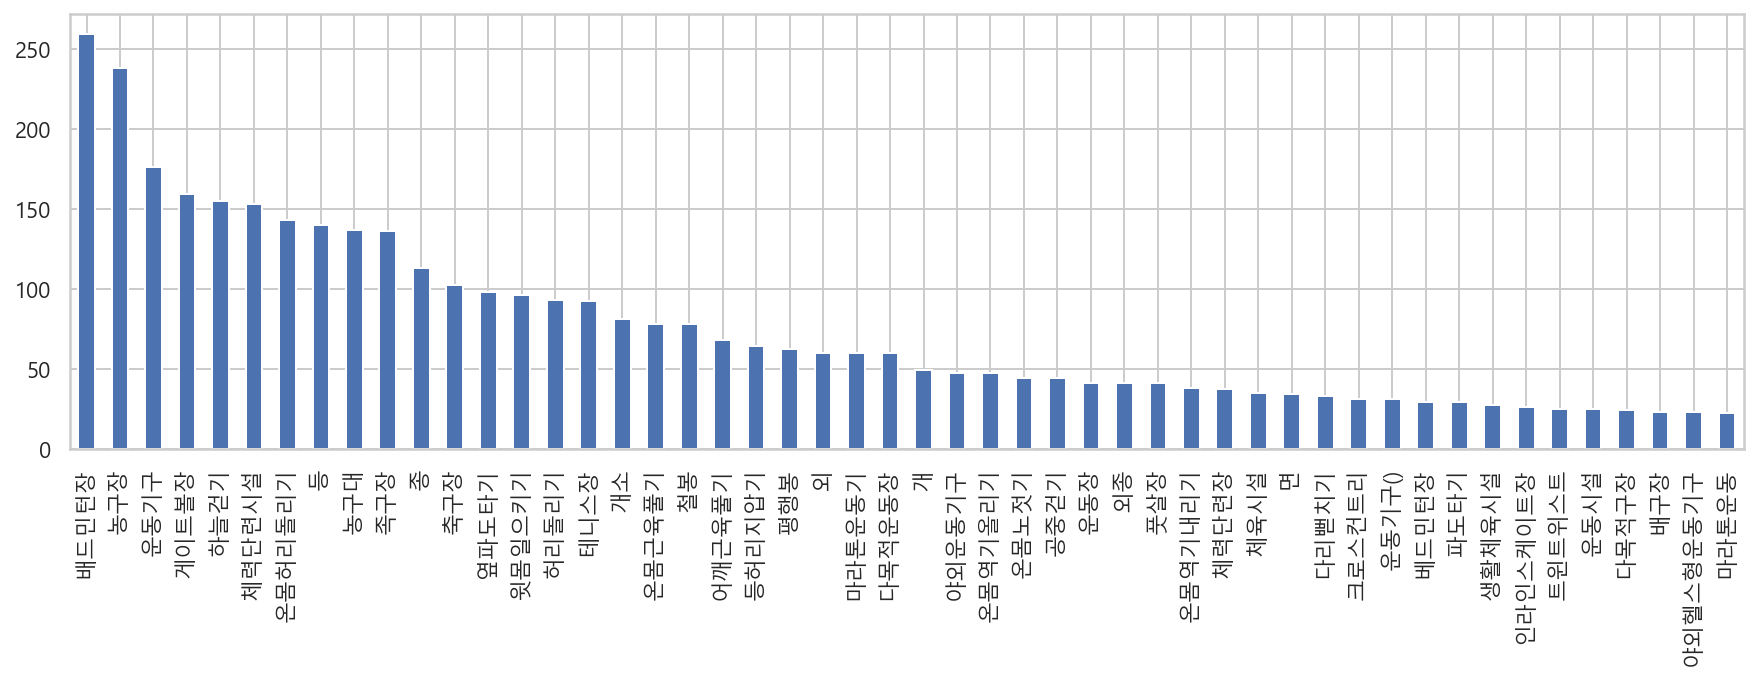

In [94]:
# 빈도수를 구한 gym_count 변수에서 head를 통해 상위 50개 단어에 대한 그래프를 그립니다.
gym_count.head(50).plot.bar(figsize=(15,4))


### 워드클라우드로 빈도수 표현하기
[amueller/word_cloud: A little word cloud generator in Python](https://github.com/amueller/word_cloud)

* 별도의 설치가 필요합니다. 
* 다음 명령어로 설치가 가능합니다. conda prompt 혹은 터미널을 열어 설치해 주세요.

* conda 사용시 : `conda install -c conda-forge wordcloud`
* pip 사용시 : `pip install wordcloud`

In [107]:
# 공식문서의 튜토리얼을 보고 wordcloud를 그리는 함수를 만들어 봅니다.
# 이때 폰트 설정시 폰트명이 아닌 폰트의 설치 경로를 입력해 주셔야 합니다.
# 윈도우 : r"C:\Windows\Fonts\malgun.ttf" 해당 경로에 폰트가 있는지 확인을 해주세요.
# 맥 : r"/Library/Fonts/AppleGothic.ttf"
# 나눔고딕 등의 폰트를 설치했다면 : '/Library/Fonts/NanumBarunGothic.ttf'
from wordcloud import WordCloud

def wordcloud(data, width=1200, height=500):
    word_draw = WordCloud(
        font_path=r"/Library/Fonts/malgun.ttf",
        width=width, height=height,
        stopwords=["운동기구", "개소", "외종"], 
        background_color="white",
        random_state=42
    )
    word_draw.generate(data)

    plt.figure(figsize=(15, 7))
    plt.imshow(word_draw)
    plt.axis("off")
    plt.show()

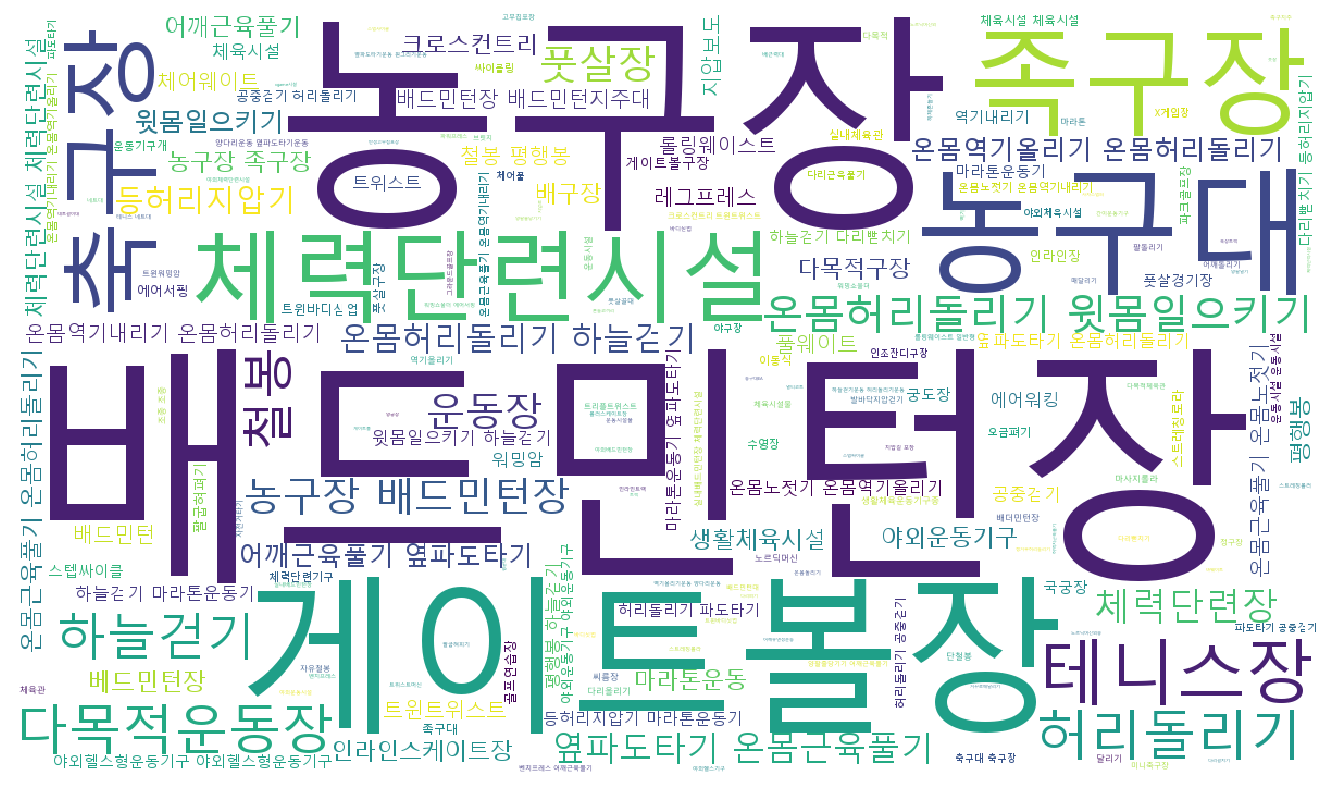

In [108]:
# 위에서 만든 함수에 전처리한 text인 gym을 넣어 그려봅니다.

wordcloud(gym, 1200, 700)


### 편익시설

In [45]:
# 편익시설에서 필요 없는 문자를 제거하고
# 토큰화를 위해 각 시설을 "," 로 구분하도록 전처리를 하는 함수를 구현합니다. 
# 함수명은 get_string 으로 합니다.


In [46]:
# 함수가 잘 구현되었는지 확인해 봅니다.
# 다음의 문자를 전처리 했을 때  
# "[1. '화장실' 5, 2. 주차장, -, nan]" 전처리 후 '화장실,주차장,' 가 출력되는지 확인해 주세요.



In [47]:
# 결측치를 넣어봅니다. 오류가 나지않는지 확인해 주세요.




In [48]:
# map을 통해 위에서 구현한 함수를 적용해 줍니다.
# 원본과 비교해 보기 위해 "편익시설"이라는 새로운 컬럼을 만듭니다.


In [49]:
# 전처리 한 "편익시설"의 빈도수를 구하고 
# tail 로 끝부분에 있는 데이터를 미리보기 합니다.



In [50]:
# 문자열을 연결해 주는 join 으로 편익시설을 연결해 주는 방법이 있습니다.
# 이 때, 결측치가 있으면 결측치는 숫자형태이기 때문에 문자와 연결되지 않아 오류가 납니다.
# 따라서 결측치를 제외한 값만 가져와서 연결합니다.



In [51]:
# 위에서 전처리한 "편익시설" 컬럼을 리스트 형태로 만들고 다시 str 으로 변환 합니다. 
# 위에서 만든 get_string 함수로 전처리를 합니다.



In [52]:
# ,가 2개 이상 들어가면 하나로 변경합니다.
# '화장실,주차장,,,' 텍스트를 정규표현식으로 바꿔봅니다.



In [53]:
# 다시 ","로 텍스트를 분리하고 판다스의 Series 형태로 만들고 value_counts 로 빈도수를 계산합니다.




In [54]:
# 상위 50개 단어에 대해 막대그래프를 그려봅니다.



In [55]:
# 편익시설에 대한 워드클라우드를 위에서 정의한 wordcloud 함수로 그려봅니다.



### 키워드 별 빈도수 구하기
* 위에서 빈도수를 구해보니 "파고라", "파고라등" 이라는 두 개의 단어가 다른 빈도로 세어졌습니다.
* "화장실"도 "화장실동", "공중화장실" 등 다양한 텍스트가 있는 것을 볼 수 있습니다.
* 일일이 전처리를 해주면 좋지만 데이터 전처리에는 많은 예외가 등장합니다.
* 그래서 때로는 보고자 하는 키워드를 넣고 빈도수를 구하는게 전처리를 하는 작업보다 빠를 때도 있습니다.
* 여기에서는 운동시설이나 편의시설이 있는데 특정 시설을 키워드에 넣고 구하는 방법을 사용해 봅니다.

In [56]:
# "공원보유시설(편익시설)" 에서 문자열 처리를 하기 위해 결측치를 제외한 값을 가져옵니다.
# df_fac 이라는 변수에 담습니다.



In [57]:
# facilities 리스트에 있는 값으로 for문을 활용해 컬럼을 만듭니다.
# 해당 단어가 들어가면 True, 아니면 False로 값이 표현되도록 합니다.



In [58]:
# facilities 리스트로 만든 각 컬럼의 빈도수를 구합니다. 



## 특정 정보 마스킹
### 전화번호 마스킹

In [59]:
# 가운데가 4자리일 때 번호 마스킹 "010-1234-5678"
# re.sub("규칙", "패턴", "데이터")
# 규칙
# (\d{3}) 는 숫자 3자리를 의미합니다.
# (\d{1,2}) 는 숫자 1~2자리를 의미합니다.
# 패턴
# r"\1-\2**-**\5" 의 "\숫자"는 앞에서 () 안에 정의한 값의 순서를 의미합니다. 
# 변수의 순서라고 생각해도 됩니다.
# 여기에서 \3, \4는 쓰지 않고 * 로 대체했습니다.
# r은 raw를 의미합니다.



In [60]:
# 가운데가 3자리일 때 번호 마스킹이 잘 동작하는지 확인 "010-123-5678"



In [61]:
# 가운데가 2자리일 때는 마스킹 없이 보이는지 확인하기 "010-12-5678"



In [62]:
# 국가 번호가 들어갈 때 확인하기 "+82-10-1234-5678"
# - 가 들어가거나 여러 예외사항이 있을 때 마스킹 되지 않을 수 있음 그렇다면 함수를 만들어서 해결해 보기



In [63]:
# 함수를 통해 가운데 들어오는 번호를 마스킹 하도록 처리
# 국제번호 등 다양한 형식의 번호가 들어왔을 때 
# - 를 기준으로 뒤에서 두 번째 항목을 마스킹 처리 하되, 
# 마지막 자리는 앞 두자리만 마스킹 합니다.
# 함수명은 mask_phone_number 로 합니다.



In [64]:
# 결측치가 들어갔을 때 오류가 날 수 있기 때문에 결측치를 체크합니다.



In [65]:
# 위에서 만든 함수를 map을 통해 "전화번호" 컬럼에 적용합니다.



### 이메일 주소 마스킹
* 해당 데이터에는 이메일 주소가 없지만 정규표현식을 더 연습해 보기 위해 이메일주소도 마스킹처리를 해봅니다.

In [66]:
# 이메일 주소의 형식만 남기고 모두 마스크처리 합니다.
email = "address@mail.com"


In [67]:
# 이메일 주소 아이디의 일부만 마스크처리 합니다. 
# 이 때 맨 앞과 맨 뒤 문자는 그대로 놔두고 나머지 문자에 대해 마스크 처리리를 합니다.
email = "address@mail.com"



In [68]:
# 위에서 작성한 예제를 함수로 만듭니다.

mask_email(email)

NameError: name 'mask_email' is not defined

In [ ]:
# "1234address_123@gmail.com"를 마스킹 처리 합니다.


### 자동차 등록번호 마스킹
* 역시나 해당 데이터에는 자동차 등록번호가 없지만 정규표현식을 더 연습해 보기 위해 마스킹처리를 해봅니다.

In [ ]:
# 자동차 등록번호를 마스킹 합니다. 
# r'*\2\3**\5' 여기에서 \1 에 해당되는 한글 앞의 숫자는 
# 몇 자리가 들어가든 한글 바로 앞의 마지막 한자리만 봅니다.
# 따라서 앞에 있는 숫자는 마지막 번호만 마스킹 하게 됩니다.
car_num = "32가1234"



In [ ]:
# 자동차 등록번호를 마스킹 합니다. 
car_num = "안녕하세요. 자동차 등록 번호는 132가1234 입니다."


# 데이터 요약하기
## 수치형, 범주형 변수 구분하기

In [ ]:
# data_types 변수에 데이터 타입만 따로 모으기



## 수치형 변수 요약

In [ ]:
# 수치형 변수 구하기
# var_numbers 변수에 담습니다.



In [ ]:
# 히스토그램을 그리면 수치형 변수에 대한 빈도수 분포를 확인할 수 있습니다.
# 빈도수 분포 => 도수 분포표를 시각화 합니다.



In [ ]:
# describe 를 통해 요약합니다.



## 범주형 변수 요약

In [ ]:
# 범주형 변수 구하기
# var_objects 라는 변수에 저장합니다.



In [ ]:
# 문자열 타입의 데이터 describe 로 요약하기


## crosstab
* 범주형 변수끼리의 빈도수 구하기

In [ ]:
# 관리기관과 공원구분에 따른 빈도수를 구합니다.
# 결과가 많기 때문에 "체육공원"을 5개 이상 관리하는 기관명만 따로 뽑습니다.
# 숫자의 많고 적음 표시를 위해 style.background_gradient() 를 사용합니다.
# 결과를 manage_category 변수에 담습니다.


In [ ]:
# "시도" 별 "공원구분" 의 수를 구합니다.


# 시도별 공원 분포

## 시도별 공원 비율

In [ ]:
# 시도별로 합계 데이터를 출력



In [ ]:
# 합계와 비율을 함께 구합니다.
# city 라는 변수에 담습니다.



## 공원구분별 분포

In [ ]:
# "공원구분"별로 색상을 다르게 표현하고 "공원면적"에 따라 원의 크기를 다르게 그립니다.
# 제주도는 해안선과 유사한 모습으로 공원이 배치되어 있는 모습이 인상적입니다.
# df에는 전체 데이터 프레임이 df_park 에는 위경도의 이상치를 제거한 데이터가 들어있습니다.



## 시도별 공원분포

In [ ]:
# 시도별로 scatterplot 의 색상을 다르게 표현하고 공원면적에 따라 원의 크기를 다르게 그립니다.



https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

In [ ]:
# countplot 으로 시도별 빈도수를 그립니다.



## 특정 공원구분 가져오기

In [ ]:
# "공원구분"별로 빈도수를 구합니다.



In [ ]:
# str.match를 통해 특정 텍스트가 들어가는 공원만 가져오기
# ".*"는 앞뒤로 어떤 문자가 등장하든 상관없다는 의미입니다.
# 따라서 아래의 정규표현식 대신 r'(역사|체육|수변|문화)공원'를 사용해도 똑같이 동작합니다.
park_type = r'.*((역사|체육|수변|문화)공원).*'



In [ ]:
# 위에서 정의한 var_numbers 라는 변수를 가져와 출력해 봅니다.



In [ ]:
# 리스트 다루기 - var_pair 라는 변수에 리스트를 만들어서 값을 추가하고 삭제해 봅니다.
# 기존 리스트에 "공원구분" 원소 추가하기 "공원구분"에 따라 색상을 다르게 표현해 보기 위함
# var_pair 라는 변수에 담습니다. 



In [ ]:
# 기존 리스트의 원소를 제거하기 - '지정고시일', '고시연도', '고시월'
# 제거 한 후 다시 제거하려고 하면 다음과 같은 오류가 발생할 수 있습니다.
# ValueError: list.remove(x): x not in list



In [ ]:
# 위에서 가져온 var_pair 라는 변수에 담긴 리스트에 있는 컬럼을 사용해 pairplot을 그립니다.


## 피봇테이블로 시도별 공원수와 평균면적 구하기

In [ ]:
# 시도별 공원수와 "공원면적" 컬럼의 평균값, 중앙값을 구합니다.
# style.background_gradient()를 사용해서 값의 많고 적음에 따라 다른 색상으로 표현되도록 합니다.



## 내가 사는 지역의 공원을 지도에 표시해 보기

In [ ]:
# 광주광역시에 위치한 공원만 출력해 봅니다.
# df_sn 이라는 변수에 담아서 재사용 합니다.



In [ ]:
# "시도", "구군", "공원명" 컬럼만 미리보기 합니다.



### 특정 공원 정보 찾아보기
* 판교의 화랑공원을 찾아봅니다.

In [ ]:
# str.contains 로 "공원명"에 "화랑"이 들어가는 데이터를 찾습니다.



In [ ]:
# cols 컬럼에 특정 컬럼만 불러와서 봅니다.
# '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)' 



###  지도에 표현하기
* 다음의 문서를 활용해서 지도를 표현합니다.
* https://nbviewer.jupyter.org/github/python-visualization/folium/blob/master/examples/Quickstart.ipynb
* Folium 사용예제 :
http://nbviewer.jupyter.org/github/python-visualization/folium/tree/master/examples/

In [ ]:
# folium 으로 지도에 표현해 봅니다.
# 지도에서 한글이 깨지면 html 문서로 저장해서 보세요

